In [22]:
import torch
import numpy as np
from aitlas.models import ResNet50, VisionTransformer
from aitlas.visualizations import GradCAM, ClassifierOutputTarget, show_cam_on_image, reshape_transform
from torchvision import transforms
from PIL import Image
from matplotlib.pyplot import imshow

## Load and transform the input image

In [23]:
input_image = Image.open("industrial_559_Level3_1.86m.tif")

data_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ])
input_tensor = data_transforms(input_image).unsqueeze(0)
# Set the target, the input parameter is the index of the label for which to calculate the GradCAM
targets = [ClassifierOutputTarget(17)]

# GradCAM for classification using ResNet50 model 

2023-03-06 13:54:36,071 INFO Loading checkpoint ./data/experiments/models/clrs_pretrained_imagenet1K_resnet50.pth.tar
2023-03-06 13:54:36,263 INFO Loaded checkpoint ./data/experiments/models/clrs_pretrained_imagenet1K_resnet50.pth.tar at epoch 15


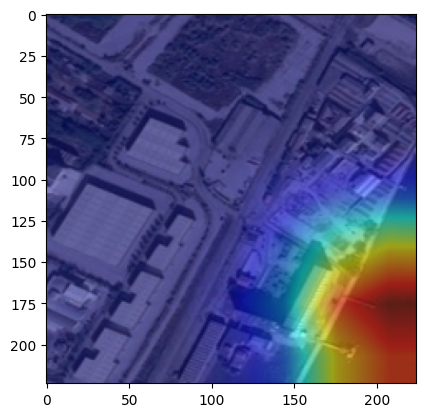

In [24]:
model_config = {
    "num_classes": 25
}
model = ResNet50(model_config)
model.prepare()
model_path = "./data/experiments/models/clrs_pretrained_imagenet1K_resnet50.pth.tar"
model.load_model(model_path)

target_layers = [model.model.layer4[-1]]

cam = GradCAM(model=model.model, target_layers=target_layers, use_cuda=True)
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]
input_image = input_image.resize((224, 224))

visualization = show_cam_on_image(np.array(input_image)/255.0, grayscale_cam, use_rgb=True)
img = Image.fromarray(visualization)
imshow(img)

# GradCAM for classification using ViT model 

In [ ]:
model_config = {
    "num_classes": 25
}
model = VisionTransformer(model_config)
model.prepare()
model_path = "./data/experiments/models/clrs_pretrained_imagenet1K_vision_transformer.pth.tar"
model.load_model(model_path)

target_layers = [model.model.blocks[-1].norm1]

# Bring the channels to the first dimension, like in CNNs by using the reshape_transform function    
cam = GradCAM(model=model.model, target_layers=target_layers, use_cuda=True, reshape_transform=reshape_transform)
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]
input_image = input_image.resize((224, 224))

visualization = show_cam_on_image(np.array(input_image)/255.0, grayscale_cam, use_rgb=True)
img = Image.fromarray(visualization)
imshow(img)